## Libraries needed

In [22]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import KFold
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

### In this notebook

We will load, clean, and select all the groups of files that we have collected about household information for the USA from 2015 to 2020. We will be manipulation 3 datasets, one from 2015, another one from 2017 and the third one from 2020.

## 1. Loading the data

In [2]:
ush15=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/US/household/2015/ahs2015n.csv')
ush17=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/US/household/2017/ahs2017n.csv')
ush20=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/US/household/2020/ahs2020n.csv' ,sep=",")

We will only be using the following variables:
    
JBLD: Type of housing unit

JGARAGE: Flag indicating unit has a garage or carport 

JPORCH: Flag indicating unit has porch or deck or balcony or patio

JBATHEXCLU: Flag indicating if the unit's bathroom facilities are for the exclusive use of the household

JBATHROOMS: Number of bathrooms in unit

JBEDROOMS: Number of bedrooms in unit

JDINING: Number of dining rooms in unit

JKITCHENS: Number of kitchens in unit

JKITEXCLU: Flag indicating if the unit's kitchen facilities are for the exclusive use of the household

JTOTROOMS: Number of total rooms in unit

JUNITFLOORS: Number of floors within the unit

JUNITSIZE: Unit size (square feet) 

JADEQUACY: Type of housing adequacy 

JUPKEEP: Type of upkeep problems

JHSHLDTYPE: Type of household

JHHGRAD: Educational level of householder

JHHRACE: Race of householder

JFINCP: Family income (past 12 months) 

JHINCP: Household income (past 12 months)

JPERPOVLVL: Household income as percent of poverty threshold (rounded)

JNEARABAND: Number of buildings that are abandoned or vandalized within 1/2 block of this housing unit

JNEARBARCL: Number of buildings with bars on windows within 1/2 block of this housing unit

JNEARTRASH: Frequency of trash, litter, or junk in streets, lots, or properties within 1/2 block of this housing unit

JRATINGHS: Rating of unit as a place to live

JRATINGNH: Rating of neighborhood as place to live


In [3]:
#Select the variables which are relevant for the study
var15=ush15[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]
var17=ush17[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]
var20=ush20[['JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]

## 2. Cleaning of datasets
Now that we have selected the relevant variables for the study, lets clean our data

In [4]:
#Removing strings to keep just the numerical data
var15 = var15.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
var17 = var17.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
var20 = var20.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))


/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_75510/4038415155.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  var15 = var15.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_75510/4038415155.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  var17 = var17.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_75510/4038415155.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  var20 = var20.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))


In [5]:
#Checking for no valuable data
var15.describe()

,JBLD,JGARAGE,JPORCH,JBATHEXCLU,JBATHROOMS,JBEDROOMS,JDINING,JKITCHENS,JKITEXCLU,JTOTROOMS,...,JHHGRAD,JHHRACE,JFINCP,JHINCP,JPERPOVLVL,JNEARABAND,JNEARBARCL,JNEARTRASH,JRATINGHS,JRATINGNH
count,69493.000000,69493.0,69493.000000,69493.0,69493.000000,69493.000000,69493.000000,69493.000000,69493.000000,69493.000000,...,69493.000000,69493.000000,69493.000000,69493.000000,69493.0,69493.0,69493.0,69493.0,69493.0,69493.0
mean,0.061906,0.0,0.006231,0.0,0.041573,0.028032,0.038709,0.023398,0.008648,0.497978,...,0.085908,0.135006,0.366353,1.241607,0.0,0.0,0.0,0.0,0.0,0.0
std,0.345217,0.0,0.078690,0.0,0.325902,0.235113,0.275537,0.215056,0.092594,0.600837,...,0.405510,0.485550,0.800927,0.902259,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,3.000000,0.0,1.000000,0.0,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,...,2.000000,2.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Checking and dropping columns with no valuable data- only 0s
var15[['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU']].value_counts()
var17[['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU']].value_counts()
var20[['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU']].value_counts()

#Drop them
var15.drop(['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU'], axis=1, inplace=True)
var17.drop(['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU'], axis=1, inplace=True)
var20.drop(['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH','JGARAGE','JBATHEXCLU'], axis=1, inplace=True)

In [7]:
#Check for null values
var15_null = var15.isnull().sum()
var17_null = var17.isnull().sum()
var20_null = var20.isnull().sum()
print(pd.concat([var15_null, var17_null, var20_null], axis=1, keys=['var15', 'var17', 'var20']))

             var15  var17  var20
JBLD             0      0      0
JPORCH           0      0      0
JBATHROOMS       0      0      0
JBEDROOMS        0      0      0
JDINING          0      0      0
JKITCHENS        0      0      0
JKITEXCLU        0      0      0
JTOTROOMS        0      0      0
JUNITFLOORS      0      0      0
JUNITSIZE        0      0      0
JADEQUACY        0      0      0
JUPKEEP          0      0      0
JHSHLDTYPE       0      0      0
JHHGRAD          0      0      0
JHHRACE          0      0      0
JFINCP           0      0      0
JHINCP           0      0      0


In [8]:
#Check variable data types for later manipulation
var15.dtypes

JBLD           int64
JPORCH         int64
JBATHROOMS     int64
JBEDROOMS      int64
JDINING        int64
JKITCHENS      int64
JKITEXCLU      int64
JTOTROOMS      int64
JUNITFLOORS    int64
JUNITSIZE      int64
JADEQUACY      int64
JUPKEEP        int64
JHSHLDTYPE     int64
JHHGRAD        int64
JHHRACE        int64
JFINCP         int64
JHINCP         int64
dtype: object

From this exploration, we can observe that our data is categorical

## 3.Data Exploration
We will now explore the correlation of our data per year, dropping those variables with a correlation >0.85

                 JBLD    JPORCH  JBATHROOMS  JBEDROOMS   JDINING  JKITCHENS  \
JBLD         1.000000  0.052546    0.026624   0.025780  0.022613   0.030498   
JPORCH       0.052546  1.000000    0.406814   0.395016  0.401692   0.425059   
JBATHROOMS   0.026624  0.406814    1.000000   0.868965  0.763459   0.819299   
JBEDROOMS    0.025780  0.395016    0.868965   1.000000  0.750045   0.797570   
JDINING      0.022613  0.401692    0.763459   0.750045  1.000000   0.770568   
JKITCHENS    0.030498  0.425059    0.819299   0.797570  0.770568   1.000000   
JKITEXCLU    0.370409  0.122953    0.156895   0.147505  0.139166   0.147376   
JTOTROOMS   -0.078903  0.230820    0.453304   0.472043  0.547819   0.438818   
JUNITFLOORS  0.001966  0.302251    0.312909   0.298968  0.286019   0.330555   
JUNITSIZE   -0.000680  0.047907   -0.000484  -0.000452 -0.000533  -0.000413   
JADEQUACY   -0.128707 -0.029051   -0.045738  -0.030250 -0.035911  -0.031952   
JUPKEEP      0.014630  0.303558    0.485535   0.4642

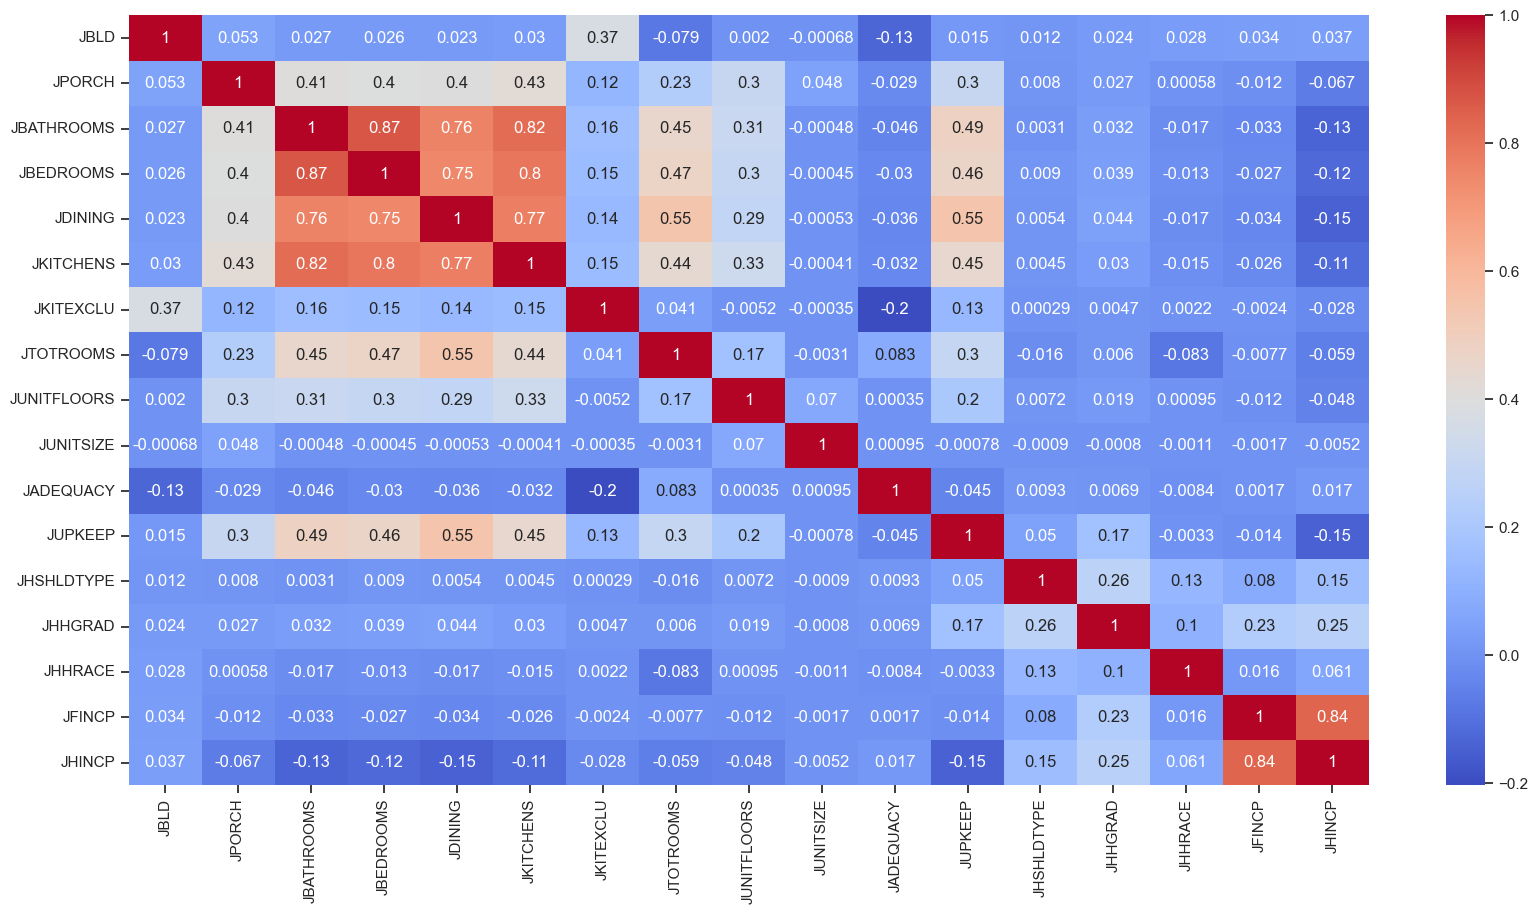

In [9]:
#2015
print(var15.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var15.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
#Drop JBATHROOMS
var15.drop('JBATHROOMS', axis=1, inplace=True)

                 JBLD    JPORCH  JBATHROOMS  JBEDROOMS   JDINING  JKITCHENS  \
JBLD         1.000000  0.030212    0.015610   0.011996  0.009742   0.011904   
JPORCH       0.030212  1.000000    0.310281   0.427169  0.420593   0.452402   
JBATHROOMS   0.015610  0.310281    1.000000   0.601727  0.565334   0.572109   
JBEDROOMS    0.011996  0.427169    0.601727   1.000000  0.760119   0.858881   
JDINING      0.009742  0.420593    0.565334   0.760119  1.000000   0.779830   
JKITCHENS    0.011904  0.452402    0.572109   0.858881  0.779830   1.000000   
JKITEXCLU    0.270260  0.129911    0.107382   0.129497  0.131356   0.137380   
JTOTROOMS   -0.089306  0.228612    0.265449   0.451224  0.526710   0.425647   
JUNITFLOORS  0.074742  0.326548    0.223594   0.292853  0.267355   0.302805   
JUNITSIZE    0.002056  0.011564    0.076420   0.111656  0.093967   0.120177   
JADEQUACY   -0.132731 -0.012036   -0.385657   0.009176 -0.019738   0.003779   
JUPKEEP      0.009522  0.307209    0.453907   0.4724

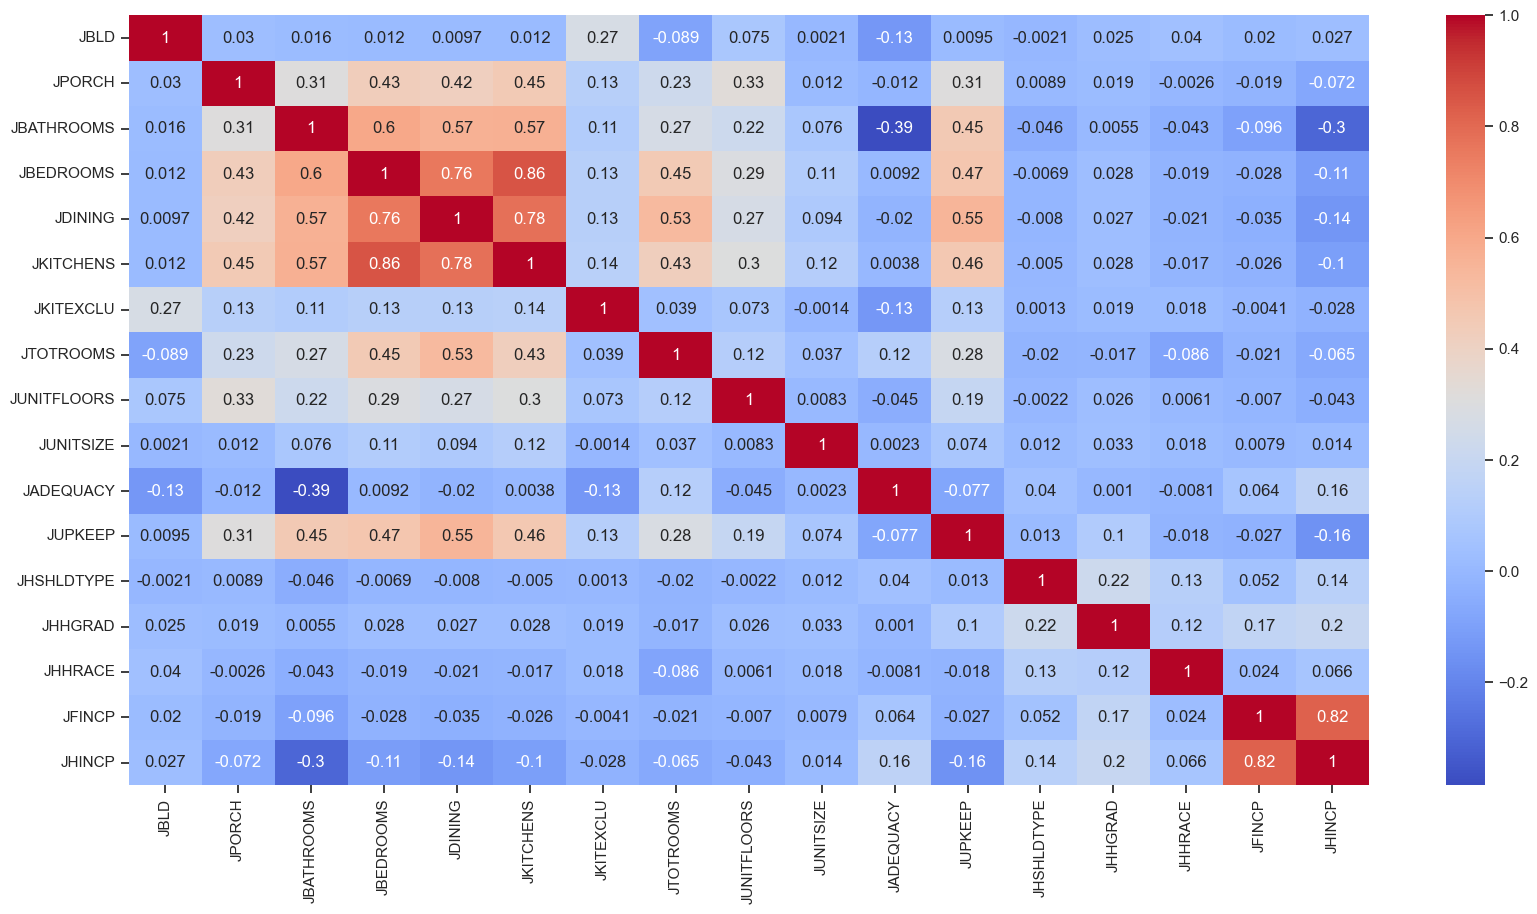

In [11]:
#2017
print(var17.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var17.corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
# Drop JKITCHENS
var17.drop('JKITCHENS', axis=1, inplace=True)

                 JBLD    JPORCH  JBATHROOMS  JBEDROOMS   JDINING  JKITCHENS  \
JBLD         1.000000  0.063563    0.054639   0.056237  0.046304   0.055814   
JPORCH       0.063563  1.000000    0.469496   0.442567  0.433705   0.463417   
JBATHROOMS   0.054639  0.469496    1.000000   0.899247  0.824699   0.865407   
JBEDROOMS    0.056237  0.442567    0.899247   1.000000  0.784589   0.871467   
JDINING      0.046304  0.433705    0.824699   0.784589  1.000000   0.797861   
JKITCHENS    0.055814  0.463417    0.865407   0.871467  0.797861   1.000000   
JKITEXCLU    0.103540  0.237760    0.293416   0.284518  0.276032   0.287234   
JTOTROOMS   -0.042029  0.248885    0.483807   0.481379  0.546530   0.455992   
JUNITFLOORS  0.102488  0.347159    0.377521   0.367504  0.340943   0.380475   
JUNITSIZE    0.008162  0.007861    0.004581   0.004591  0.003307   0.005233   
JADEQUACY   -0.090914 -0.022858   -0.025465  -0.016075 -0.020453  -0.022070   
JUPKEEP      0.041920  0.329823    0.541458   0.5018

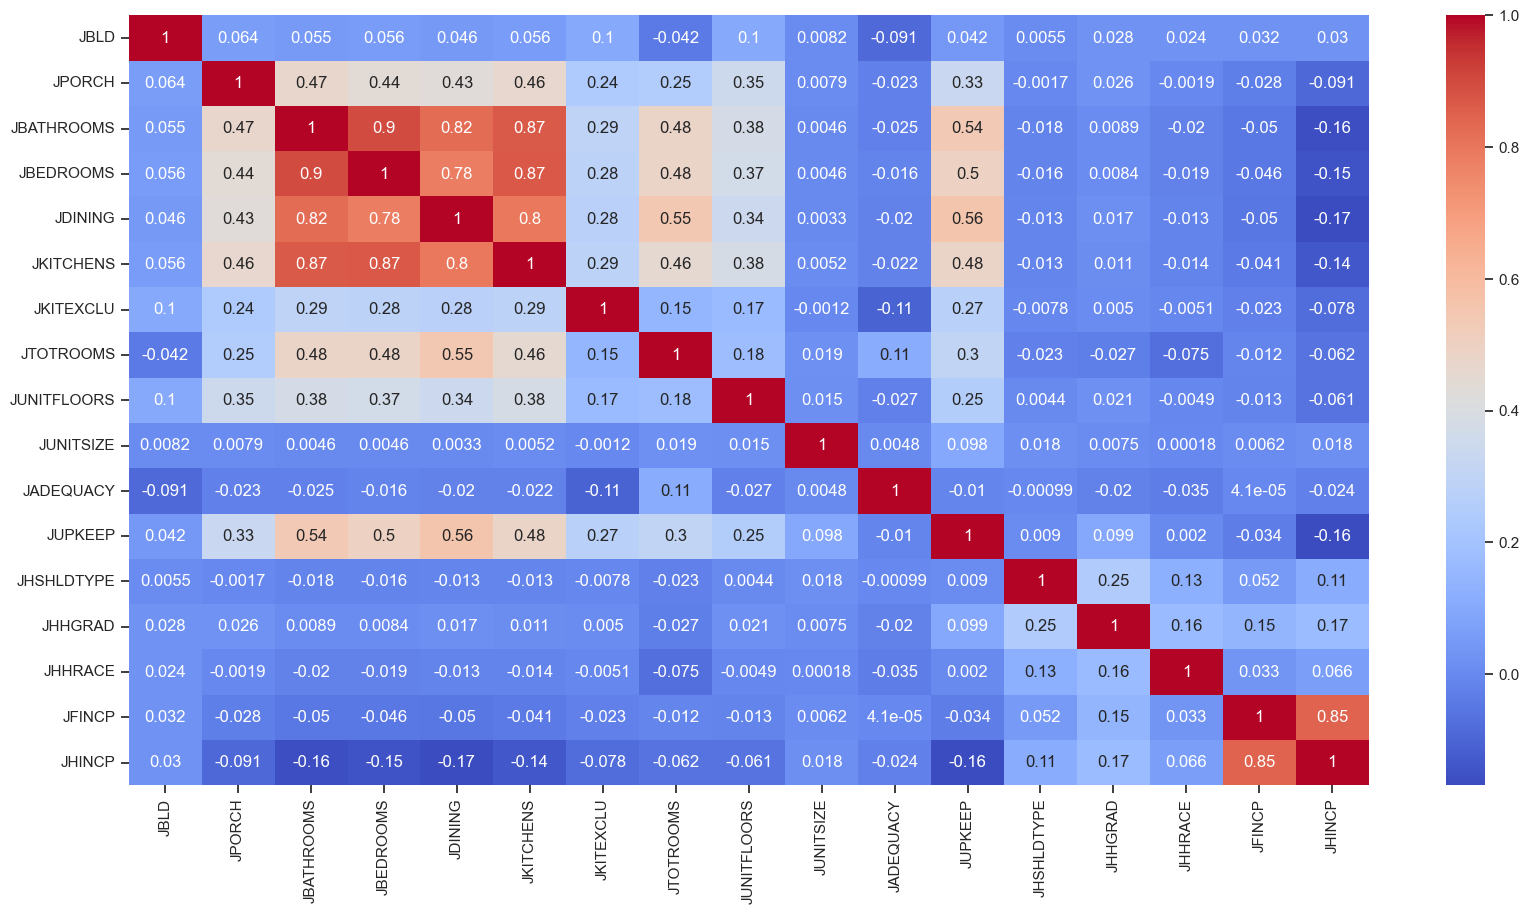

In [13]:
#2020
print(var20.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var20.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
# Drop JKITCHENS, JBATHROOMS and JFINCP
var20.drop(['JKITCHENS','JBATHROOMS','JFINCP'], axis=1, inplace=True)

Now we will look for outliers in our 3 datasets and eliminate them

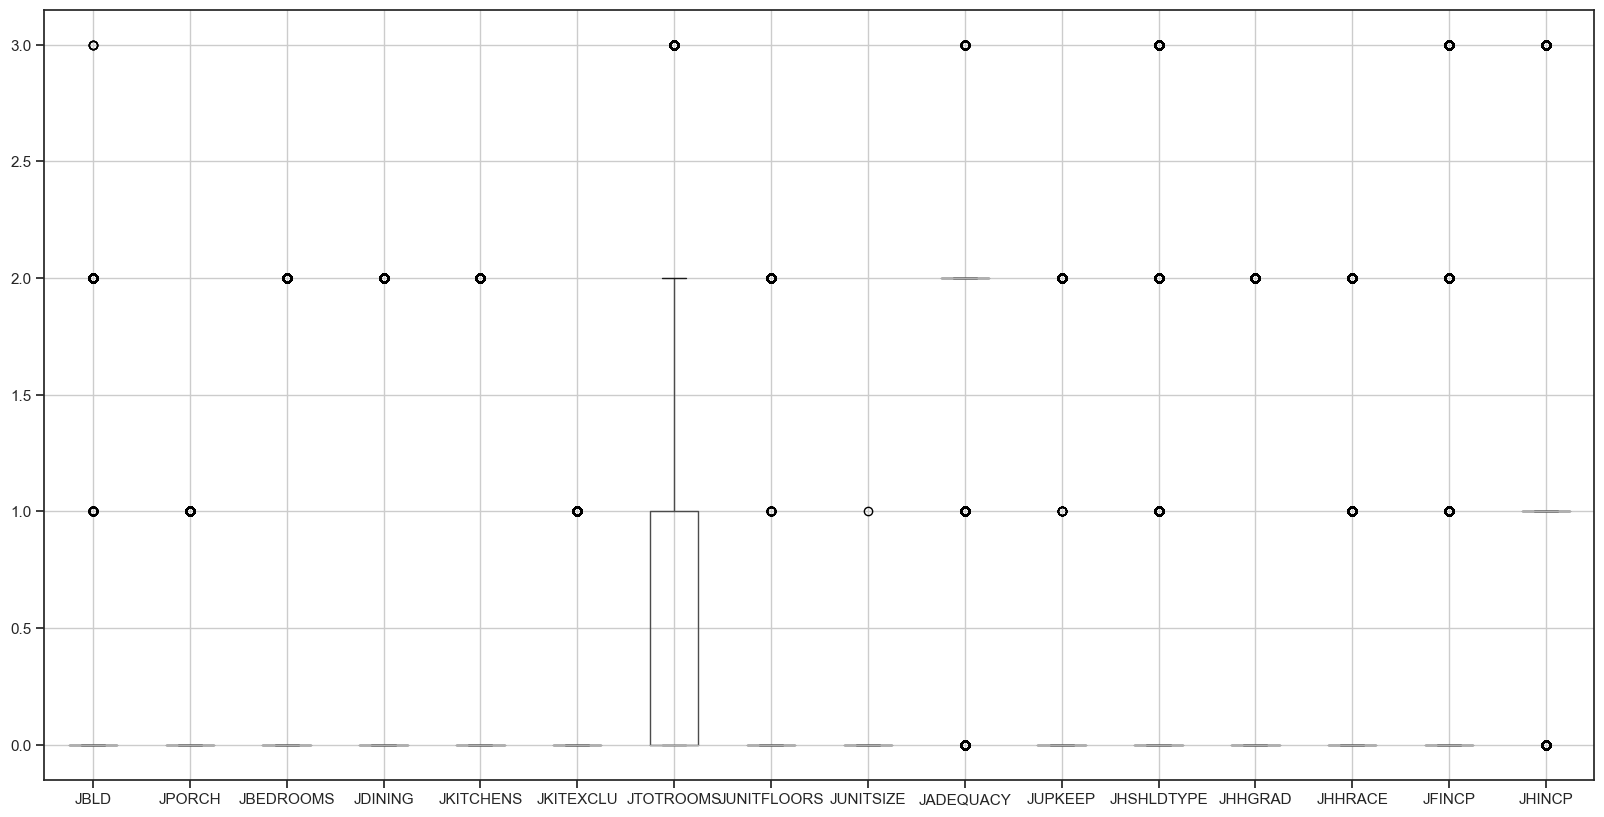

In [15]:
#2015
var15.boxplot(figsize=(20,10))
plt.show()

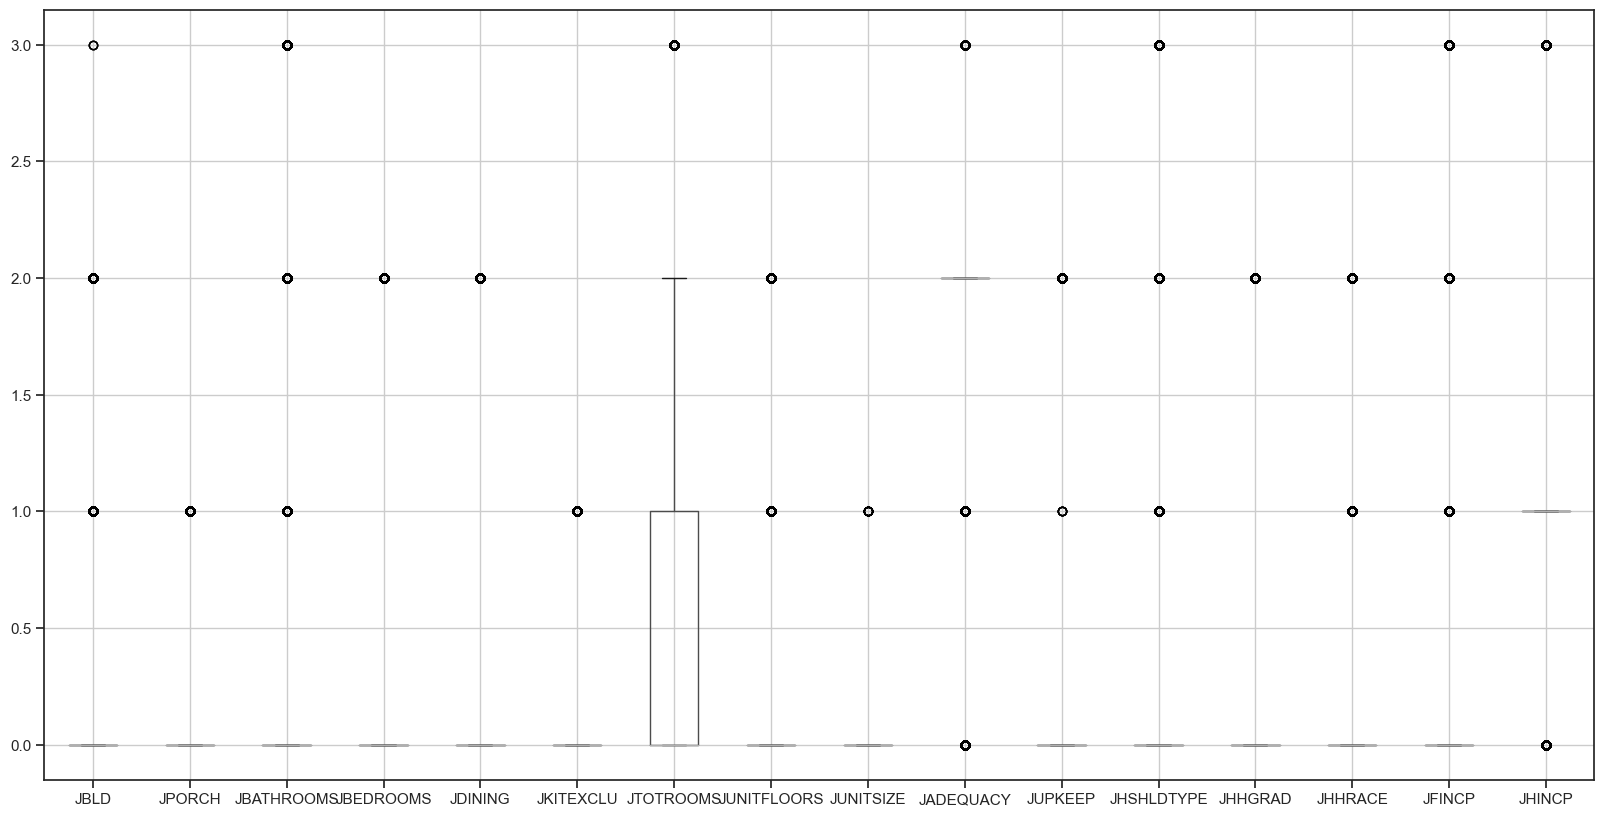

In [16]:
#2017
var17.boxplot(figsize=(20,10))
plt.show()

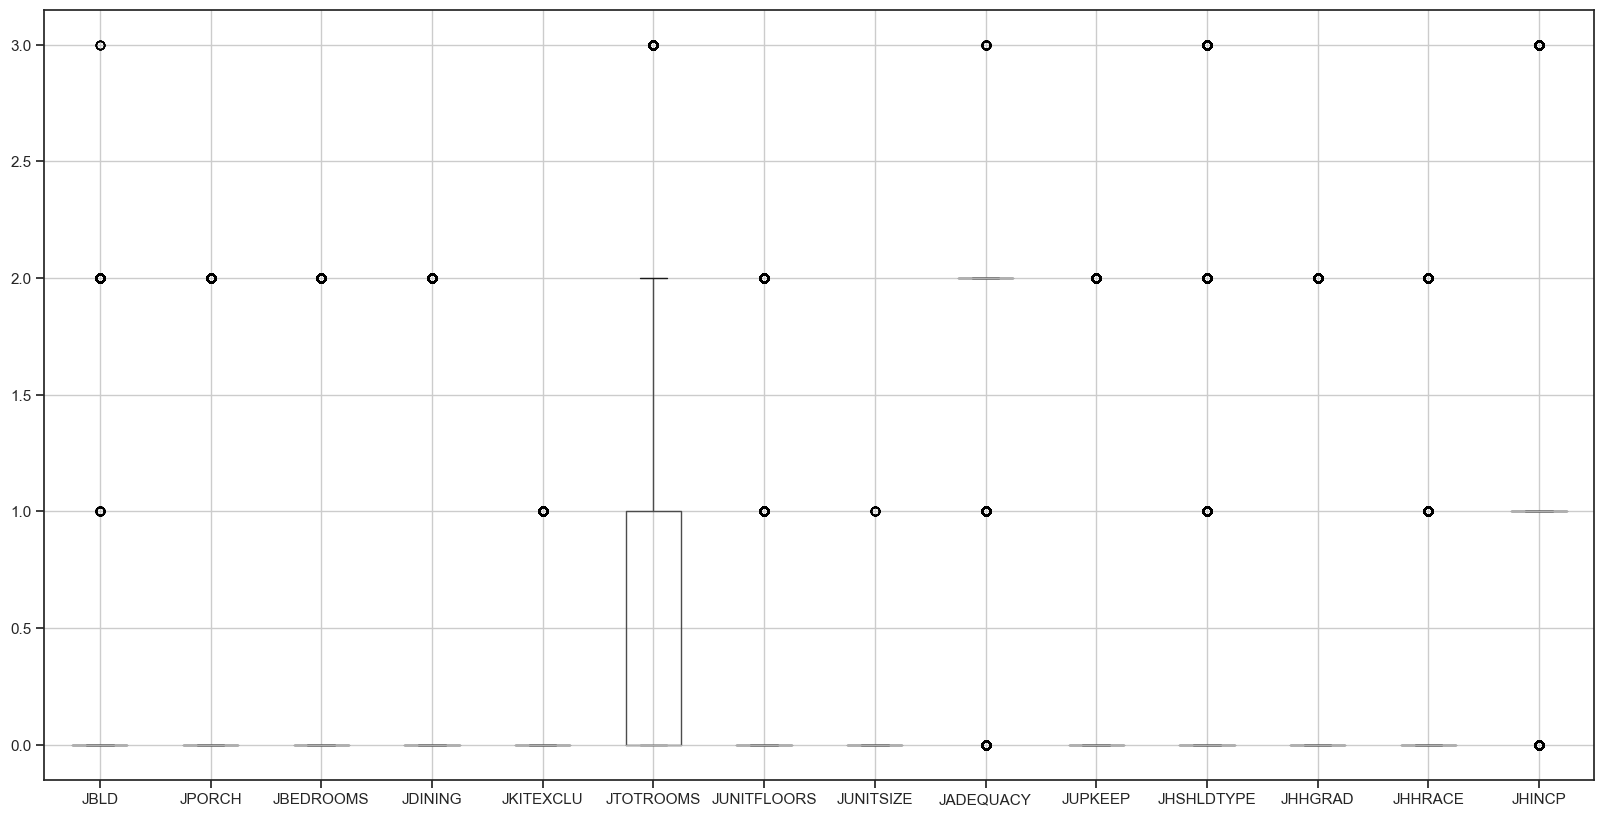

In [17]:
#2020
var20.boxplot(figsize=(20,10))
plt.show()

As we can observe from the boxplots, all our values range from 0 to 3, meaning that they are codified.

We will now look at the distributioon of our datasets.

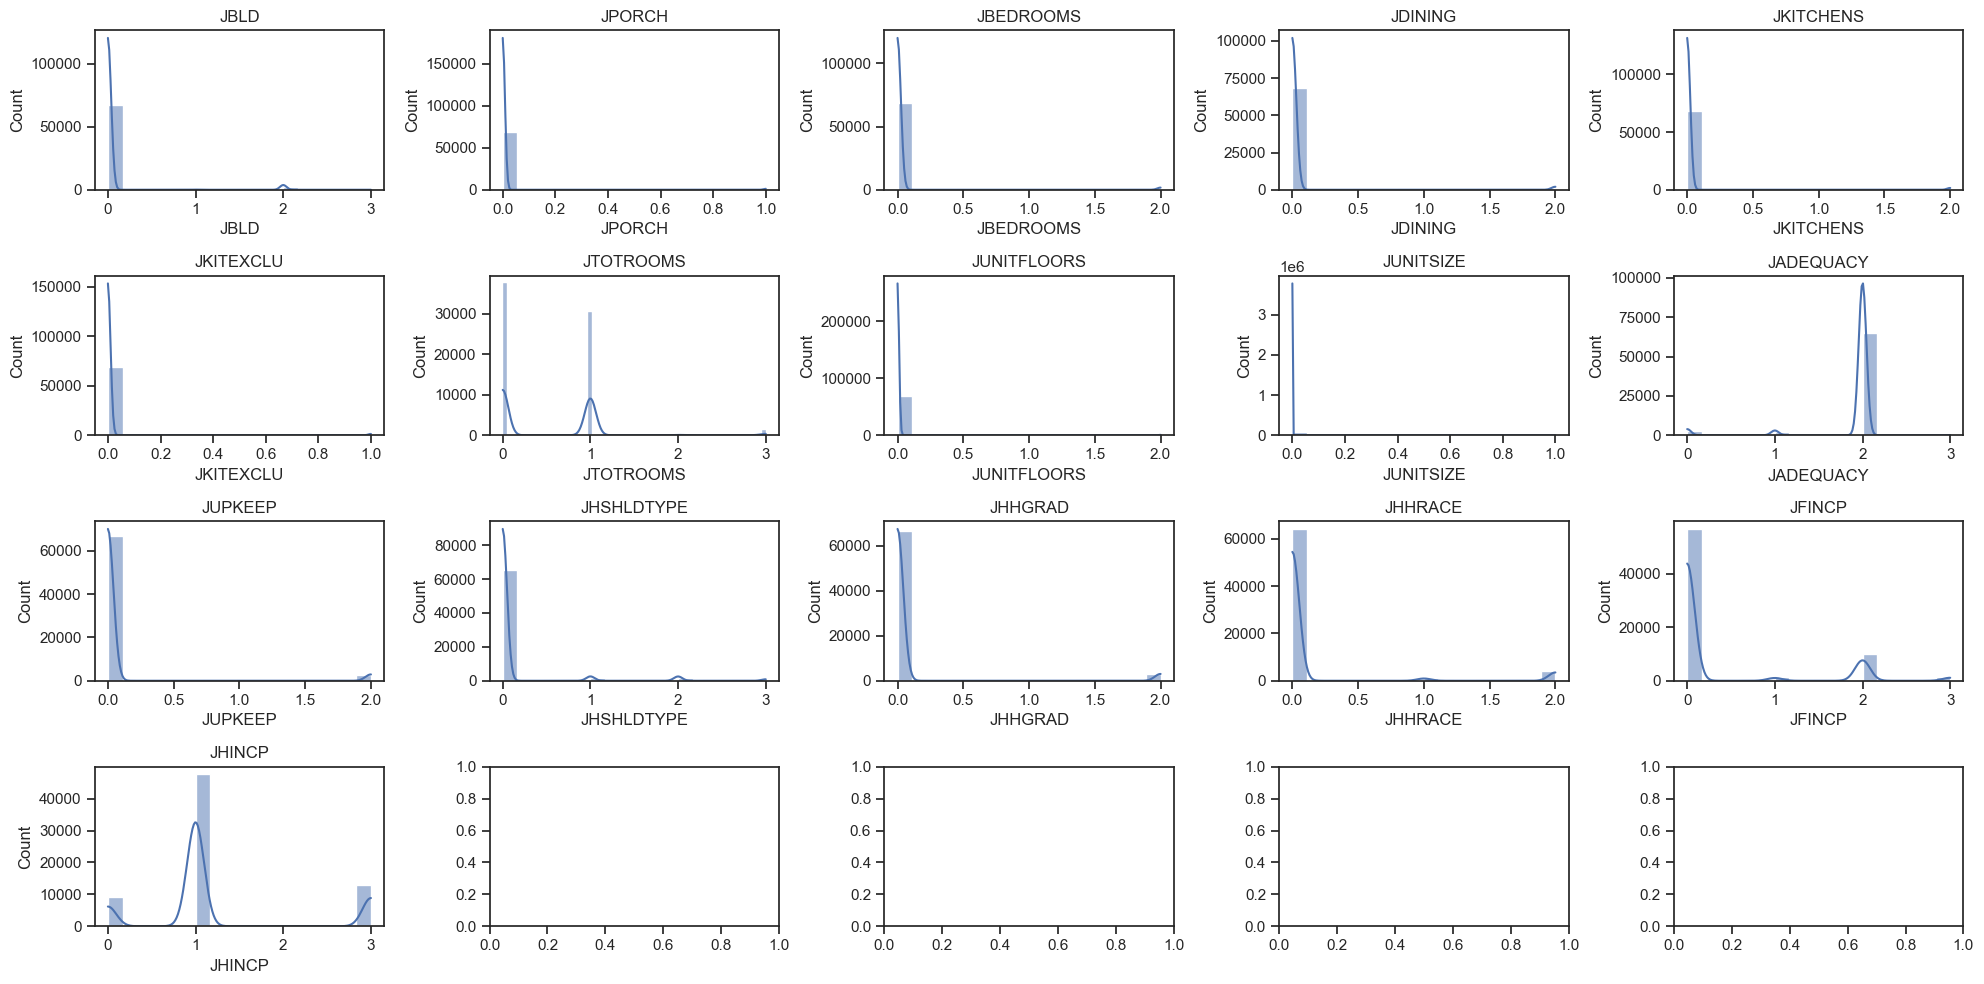

In [18]:
#2015
num_rows = 4
num_cols = 5
variable_names = list(var15.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var15[var_name], ax=ax, kde=True)
    ax.set_title(var_name)

plt.tight_layout()
plt.show()

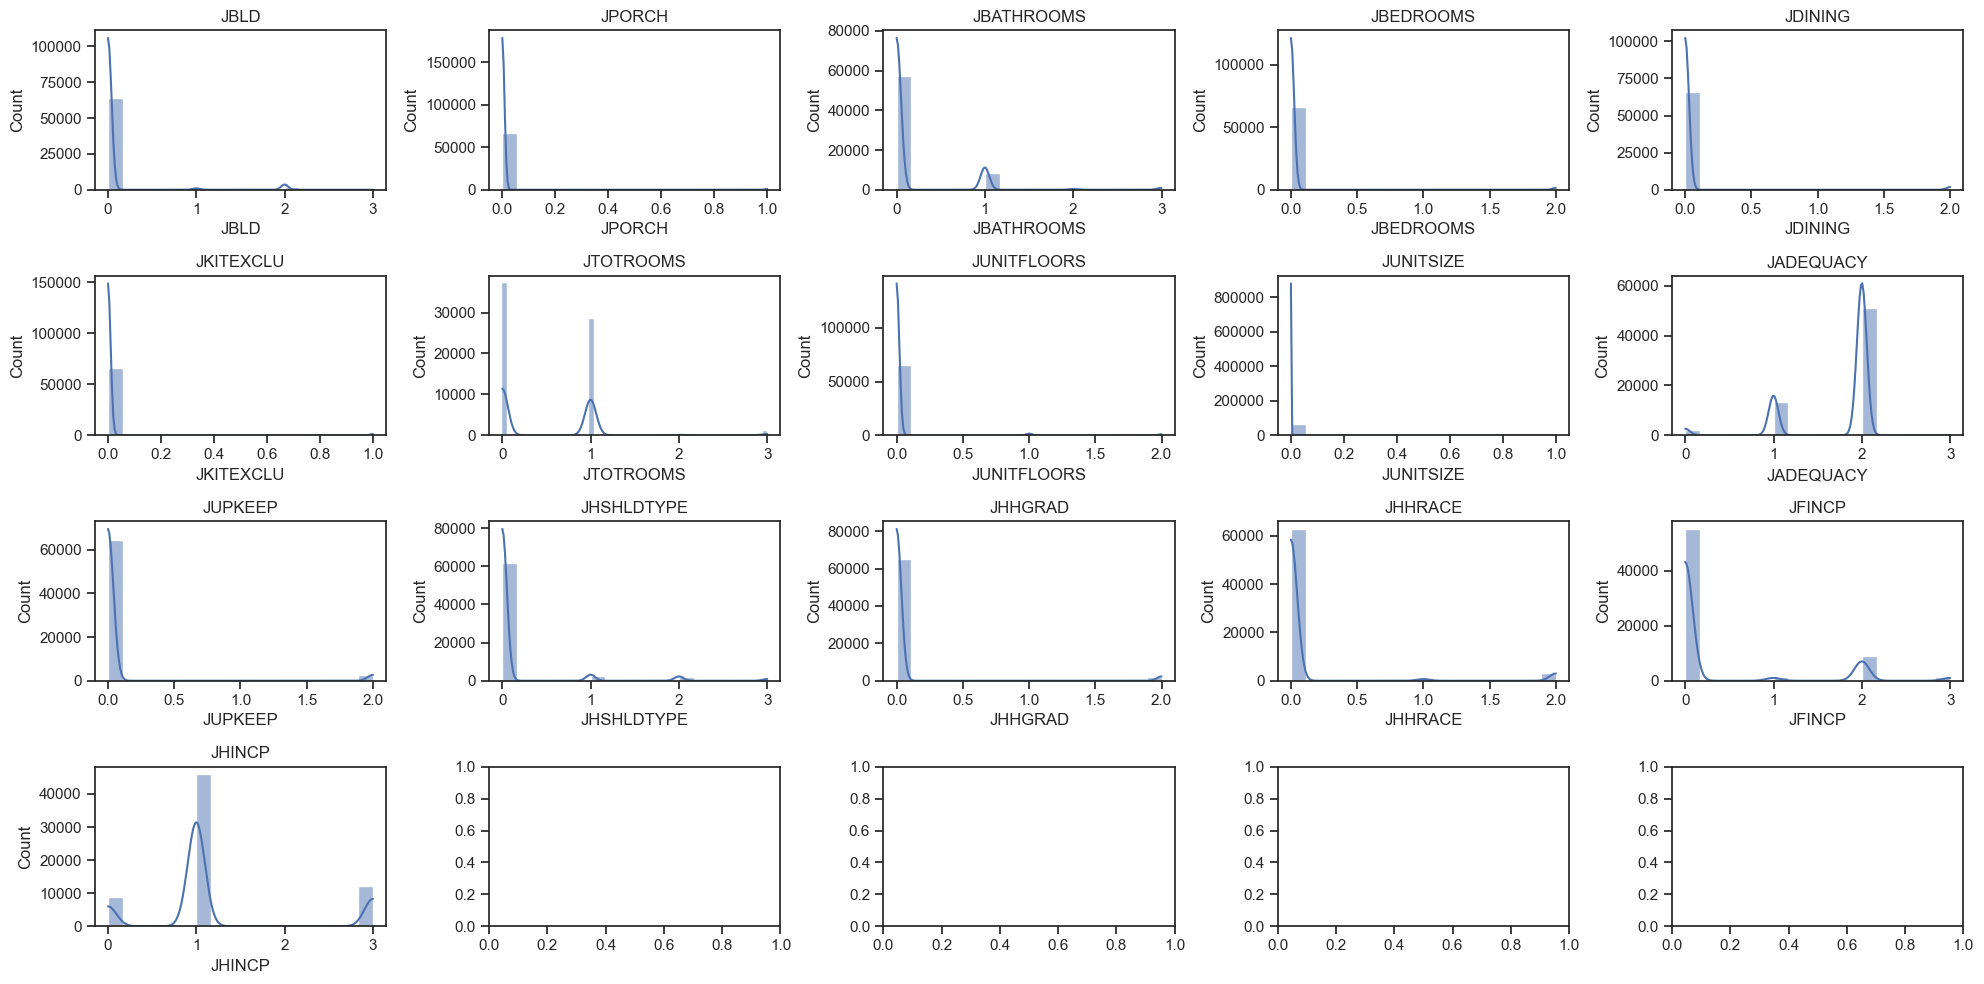

In [19]:
#2017
num_rows = 4
num_cols = 5
variable_names = list(var17.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var17[var_name], ax=ax, kde=True)
    ax.set_title(var_name)

plt.tight_layout()
plt.show()

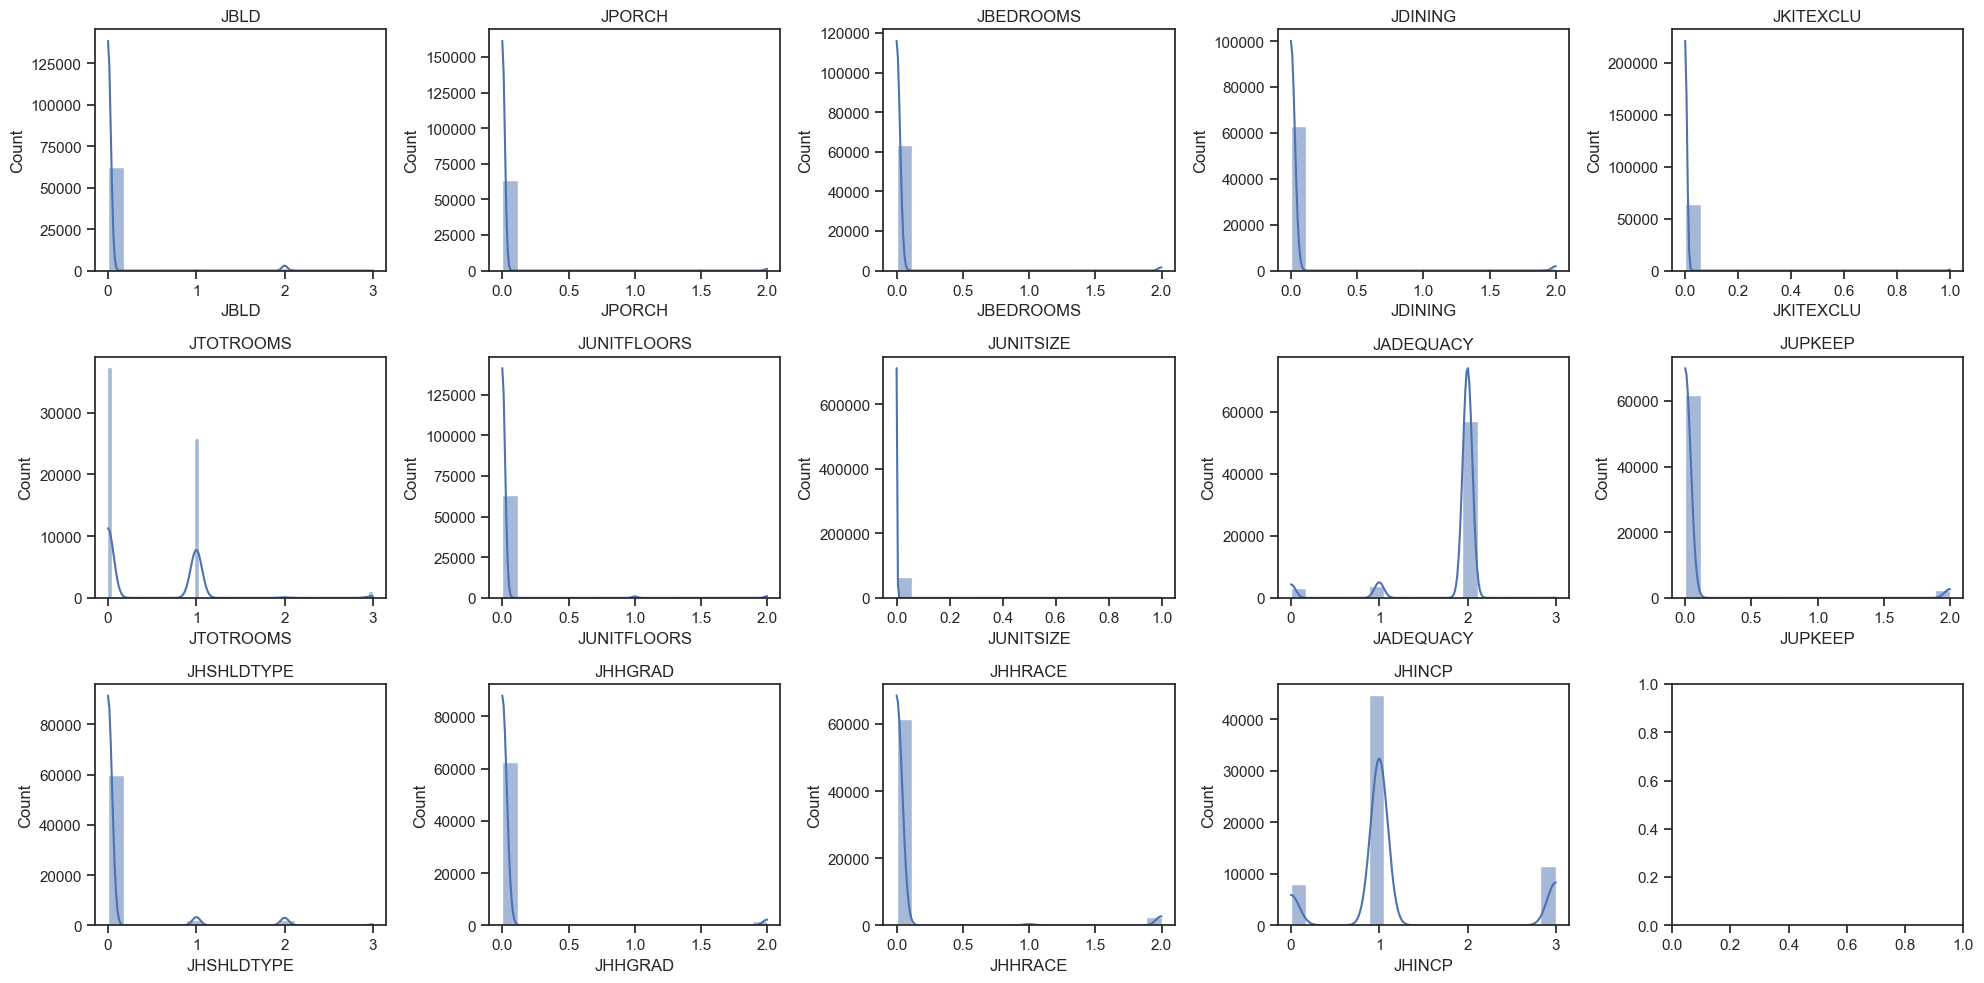

In [20]:
#2020
num_rows = 3
num_cols = 5
variable_names = list(var20.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var20[var_name], ax=ax, kde=True)
    ax.set_title(var_name)

plt.tight_layout()
plt.show()

## 4.Preprocessing of data


Now we will separately perform the clustering and check the characteristics of the clusters for each year

We will perform 3 clusters using k-modes and look at the count of each of these. Then, by looking at the mean of certain variables, we will establesh which cluster is 1:lower-class, 2:middle-class and 3:upper-class.

### 2015

In [33]:
k = 3 
kmodes_instance = KModes(n_clusters=k, init='Huang', n_init=10, verbose=1)
kmodes_clusters_15 = kmodes_instance.fit_predict(var15)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5076, cost: 66196.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 954, cost: 77017.0
Run 2, iteration: 2/100, moves: 1290, cost: 76762.0
Run 2, iteration: 3/100, moves: 157, cost: 76762.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 75896.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 59096.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4736, cost: 62949.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 56346.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 278

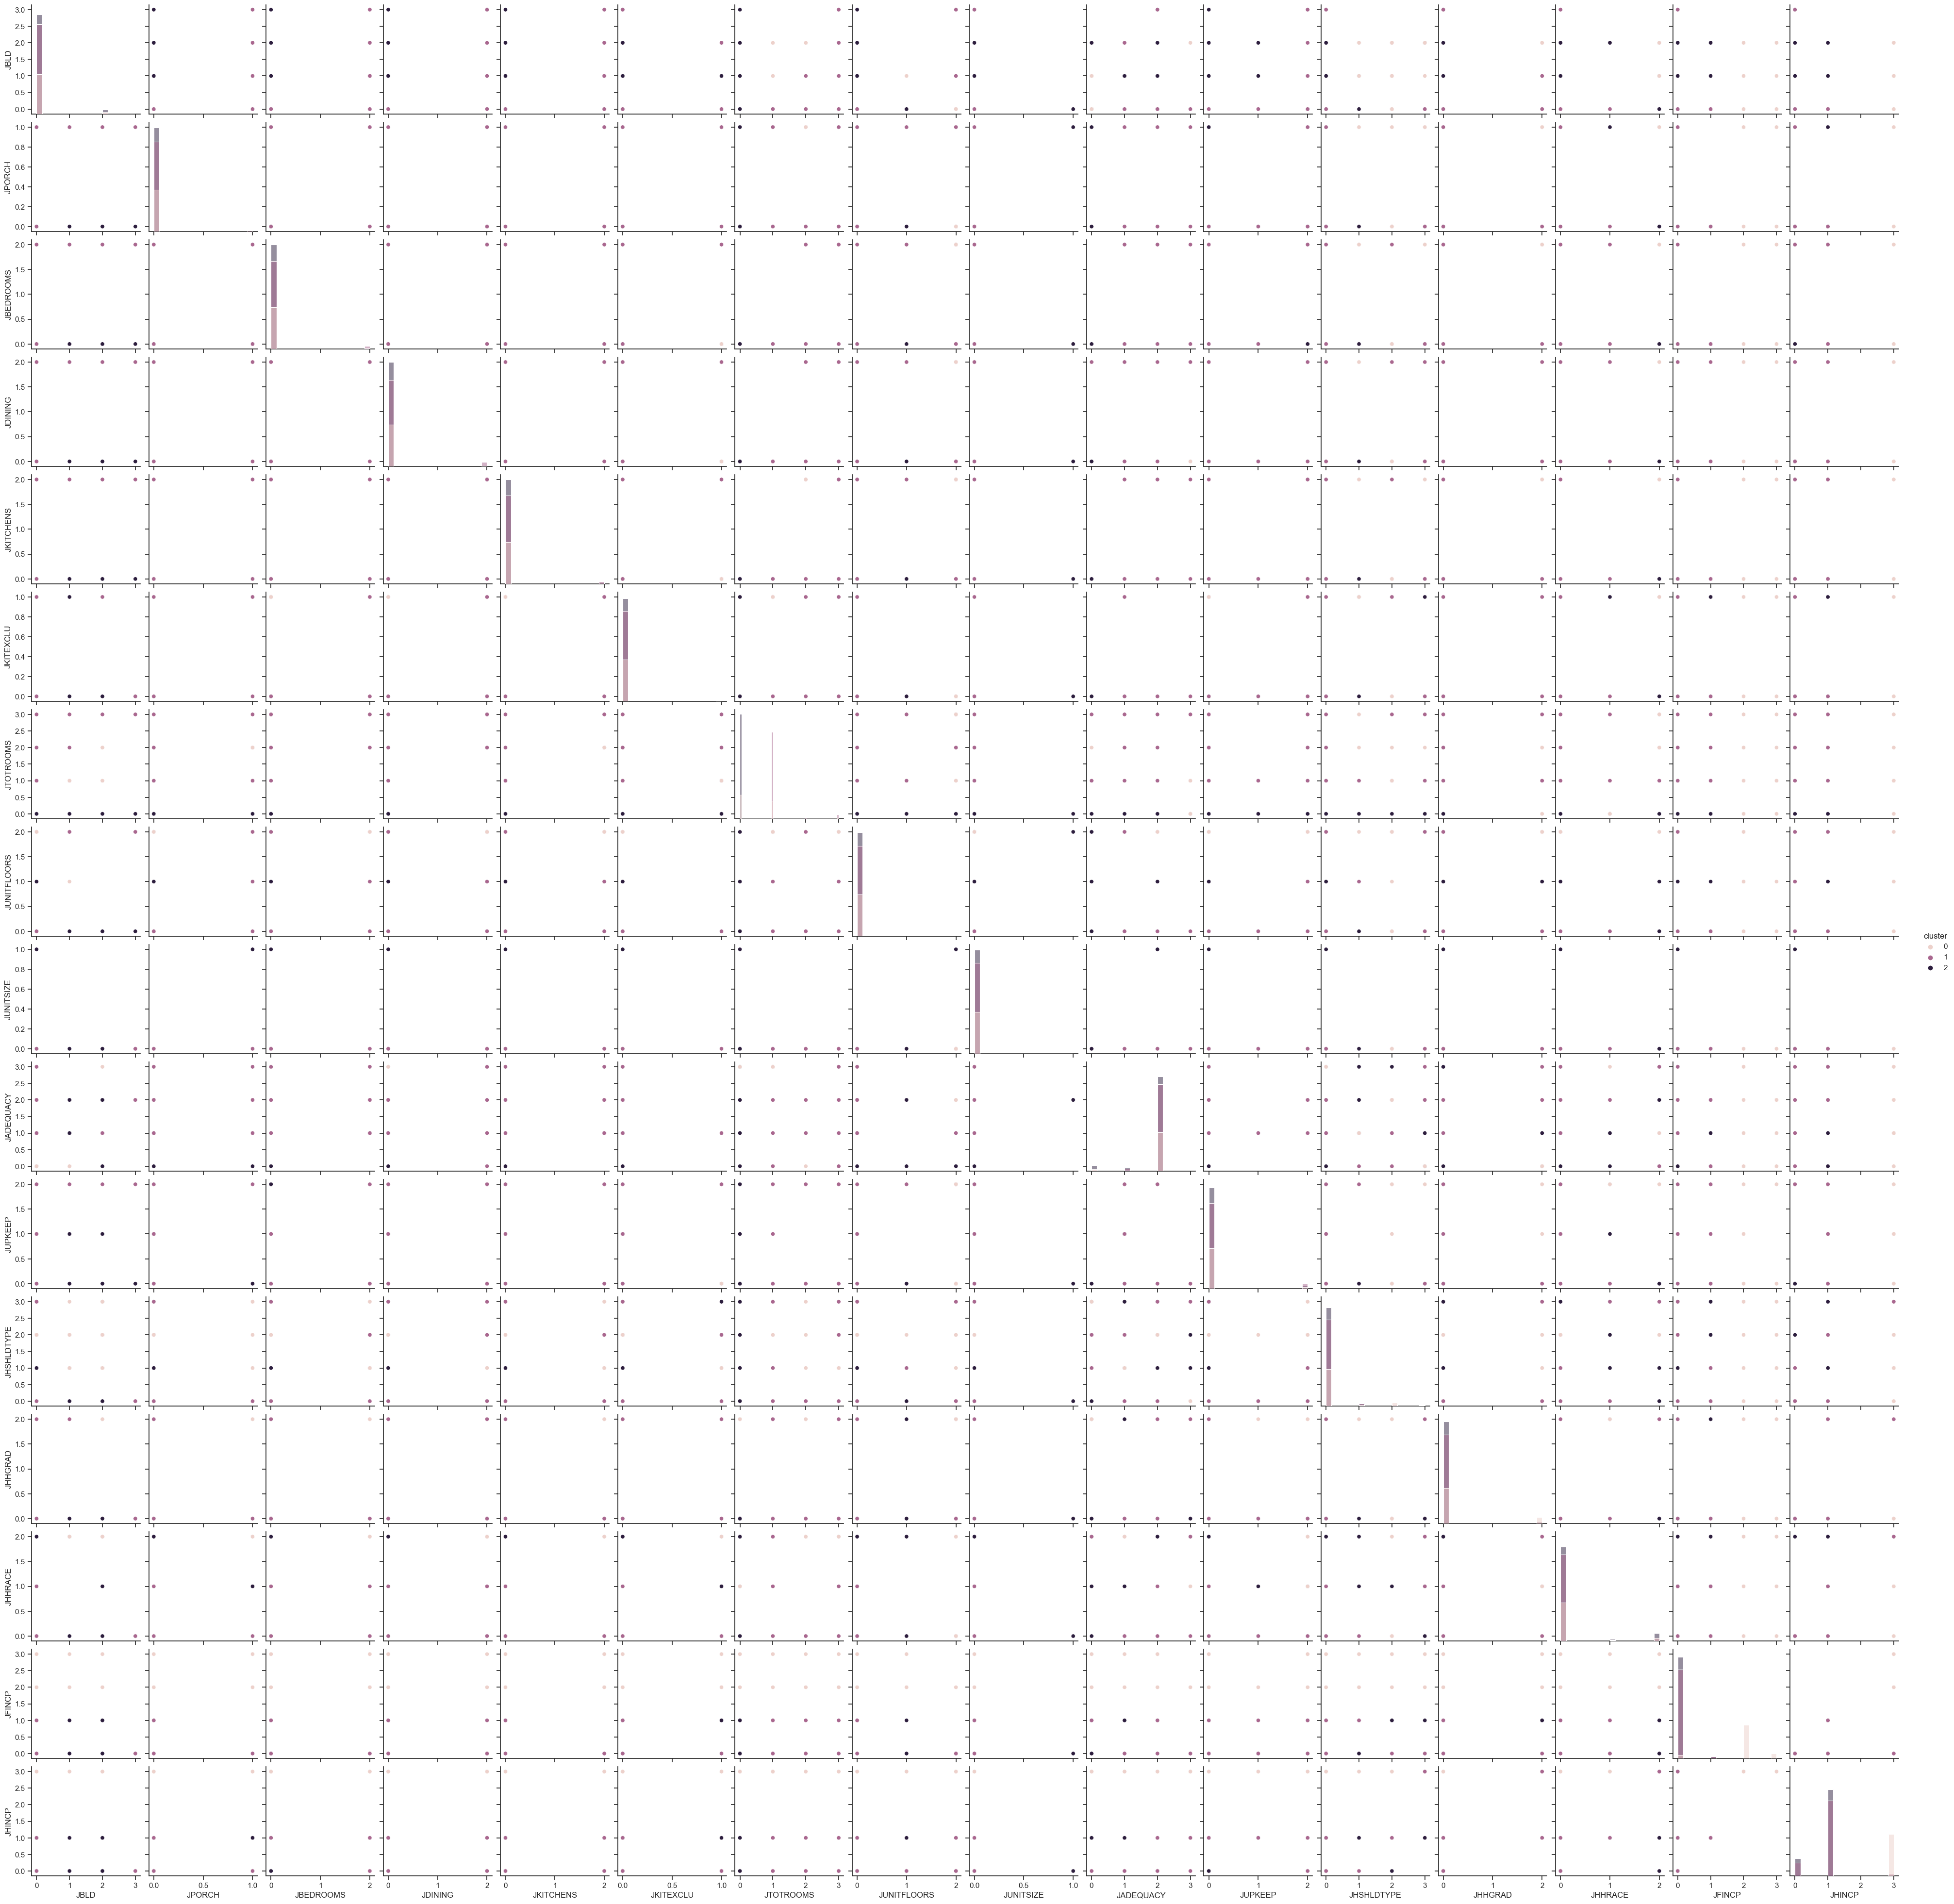

In [34]:
#Add the cluster labels to var15 and plot them against each variable
var15_clustered = var15.copy()
var15_clustered['cluster'] = kmodes_clusters_15
sns.pairplot(var15_clustered, hue='cluster', diag_kind='hist')
plt.show()

In [35]:
#Count of classes
var15_clustered['cluster'].value_counts()

2    30563
1    26623
0    12307
Name: cluster, dtype: int64

In [36]:
#determine what cluster represents each social class by checking the mean family income
mean_income = var15_clustered.groupby('cluster')['JHINCP'].mean()
print(mean_income)

cluster
0    3.000000
1    0.898434
2    0.832477
Name: JHINCP, dtype: float64


In [45]:
var15_clustered['cluster'] = var15_clustered['cluster'].replace({0:3, 1:2, 2:1})
var15_clustered['cluster'].value_counts()

1    30563
2    26623
3    12307
Name: cluster, dtype: int64

### 2017

In [37]:
kmodes_clusters_17 = kmodes_instance.fit_predict(var17)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1251, cost: 92546.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 308, cost: 84198.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5690, cost: 78008.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5204, cost: 82601.0
Run 4, iteration: 2/100, moves: 2134, cost: 82601.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5562, cost: 84680.0
Run 5, iteration: 2/100, moves: 4125, cost: 84680.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 1167, cost: 92065.0
Run 6, iteration: 2/100, moves: 20, cost: 92065.0
Init: initializing centroids
Init: initializing cluster

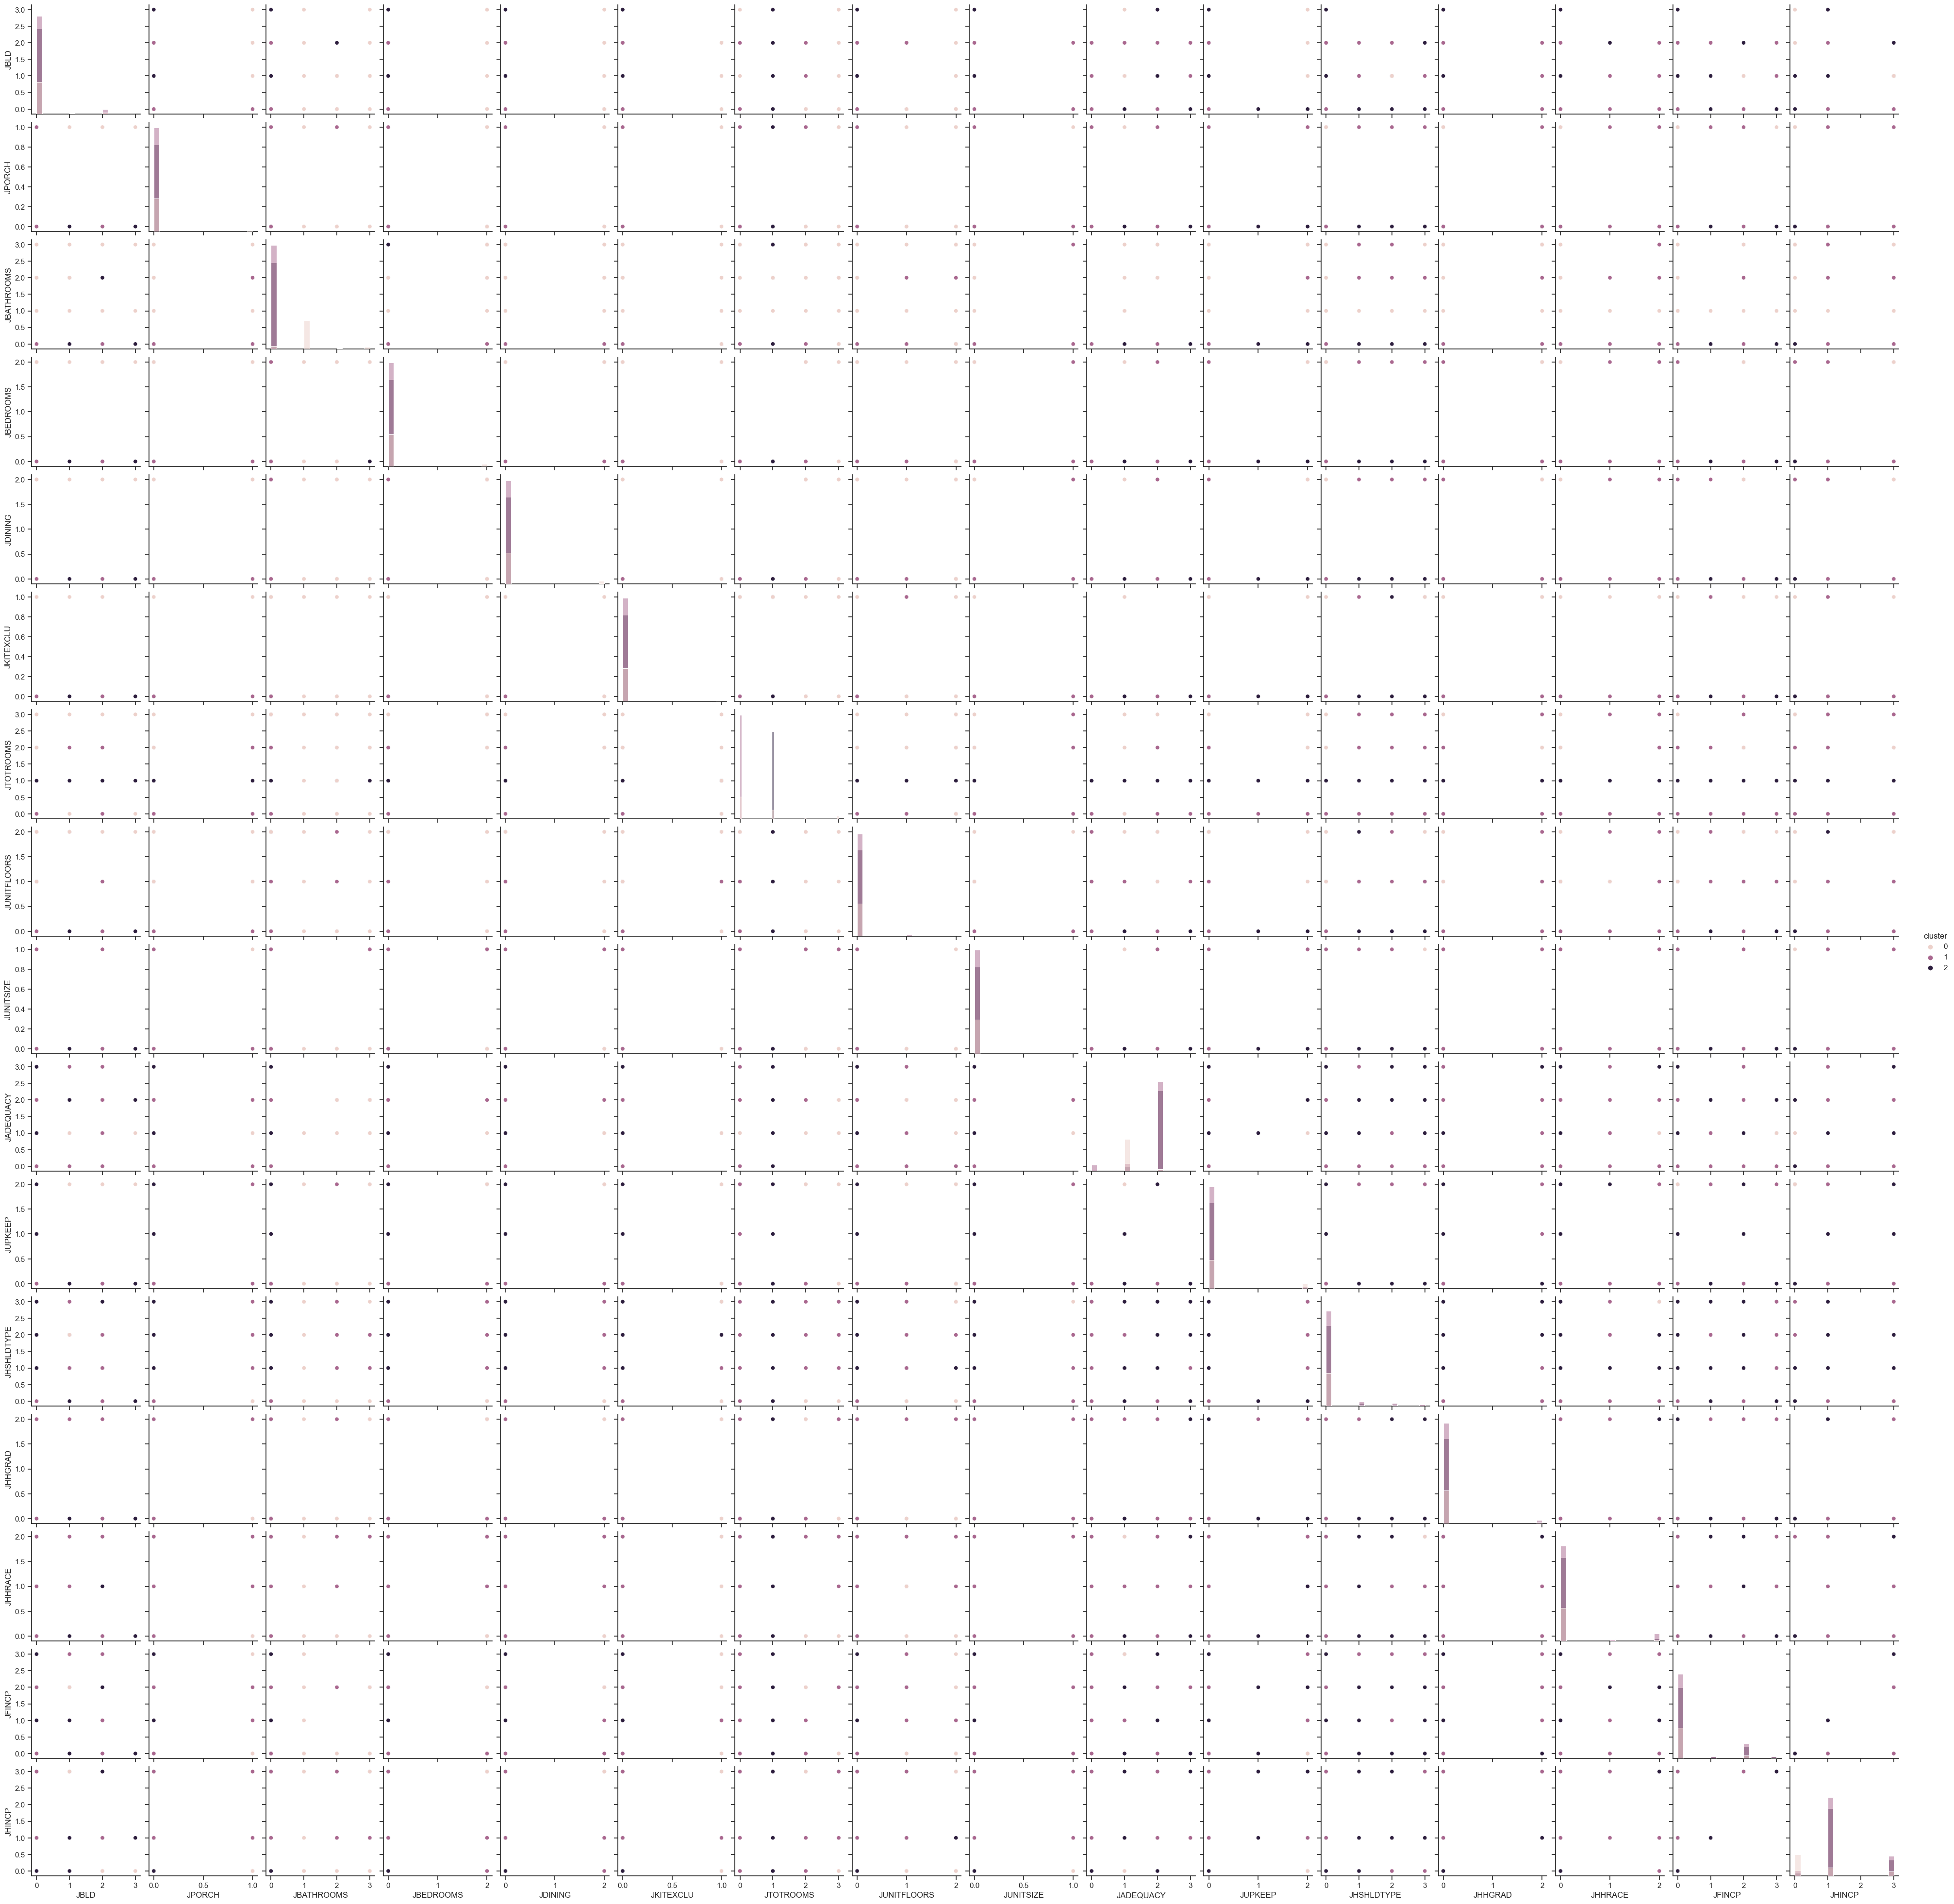

In [38]:
#Add the cluster labels to var17 and plot them against each variable
var17_clustered = var17.copy()
var17_clustered['cluster'] = kmodes_clusters_17
sns.pairplot(var17_clustered, hue='cluster', diag_kind='hist')
plt.show()

In [39]:
#Count of classes
var17_clustered['cluster'].value_counts()

1    30883
2    25720
0    10149
Name: cluster, dtype: int64

In [40]:
#determine what cluster represents each social class by checking the mean family income
mean_income = var17_clustered.groupby('cluster')['JHINCP'].mean()
print(mean_income)

cluster
0    0.642822
1    1.336496
2    1.334526
Name: JHINCP, dtype: float64


In [46]:
var17_clustered['cluster'] = var17_clustered['cluster'].replace({0:1, 1:3, 2:2})
var17_clustered['cluster'].value_counts()

3    30883
2    25720
1    10149
Name: cluster, dtype: int64

### 2020

In [41]:
kmodes_clusters_20 = kmodes_instance.fit_predict(var20)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6086, cost: 37992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 86, cost: 54726.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 69, cost: 65622.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2739, cost: 41273.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9174, cost: 37530.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 12823, cost: 37530.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 7218, cost: 41273.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...

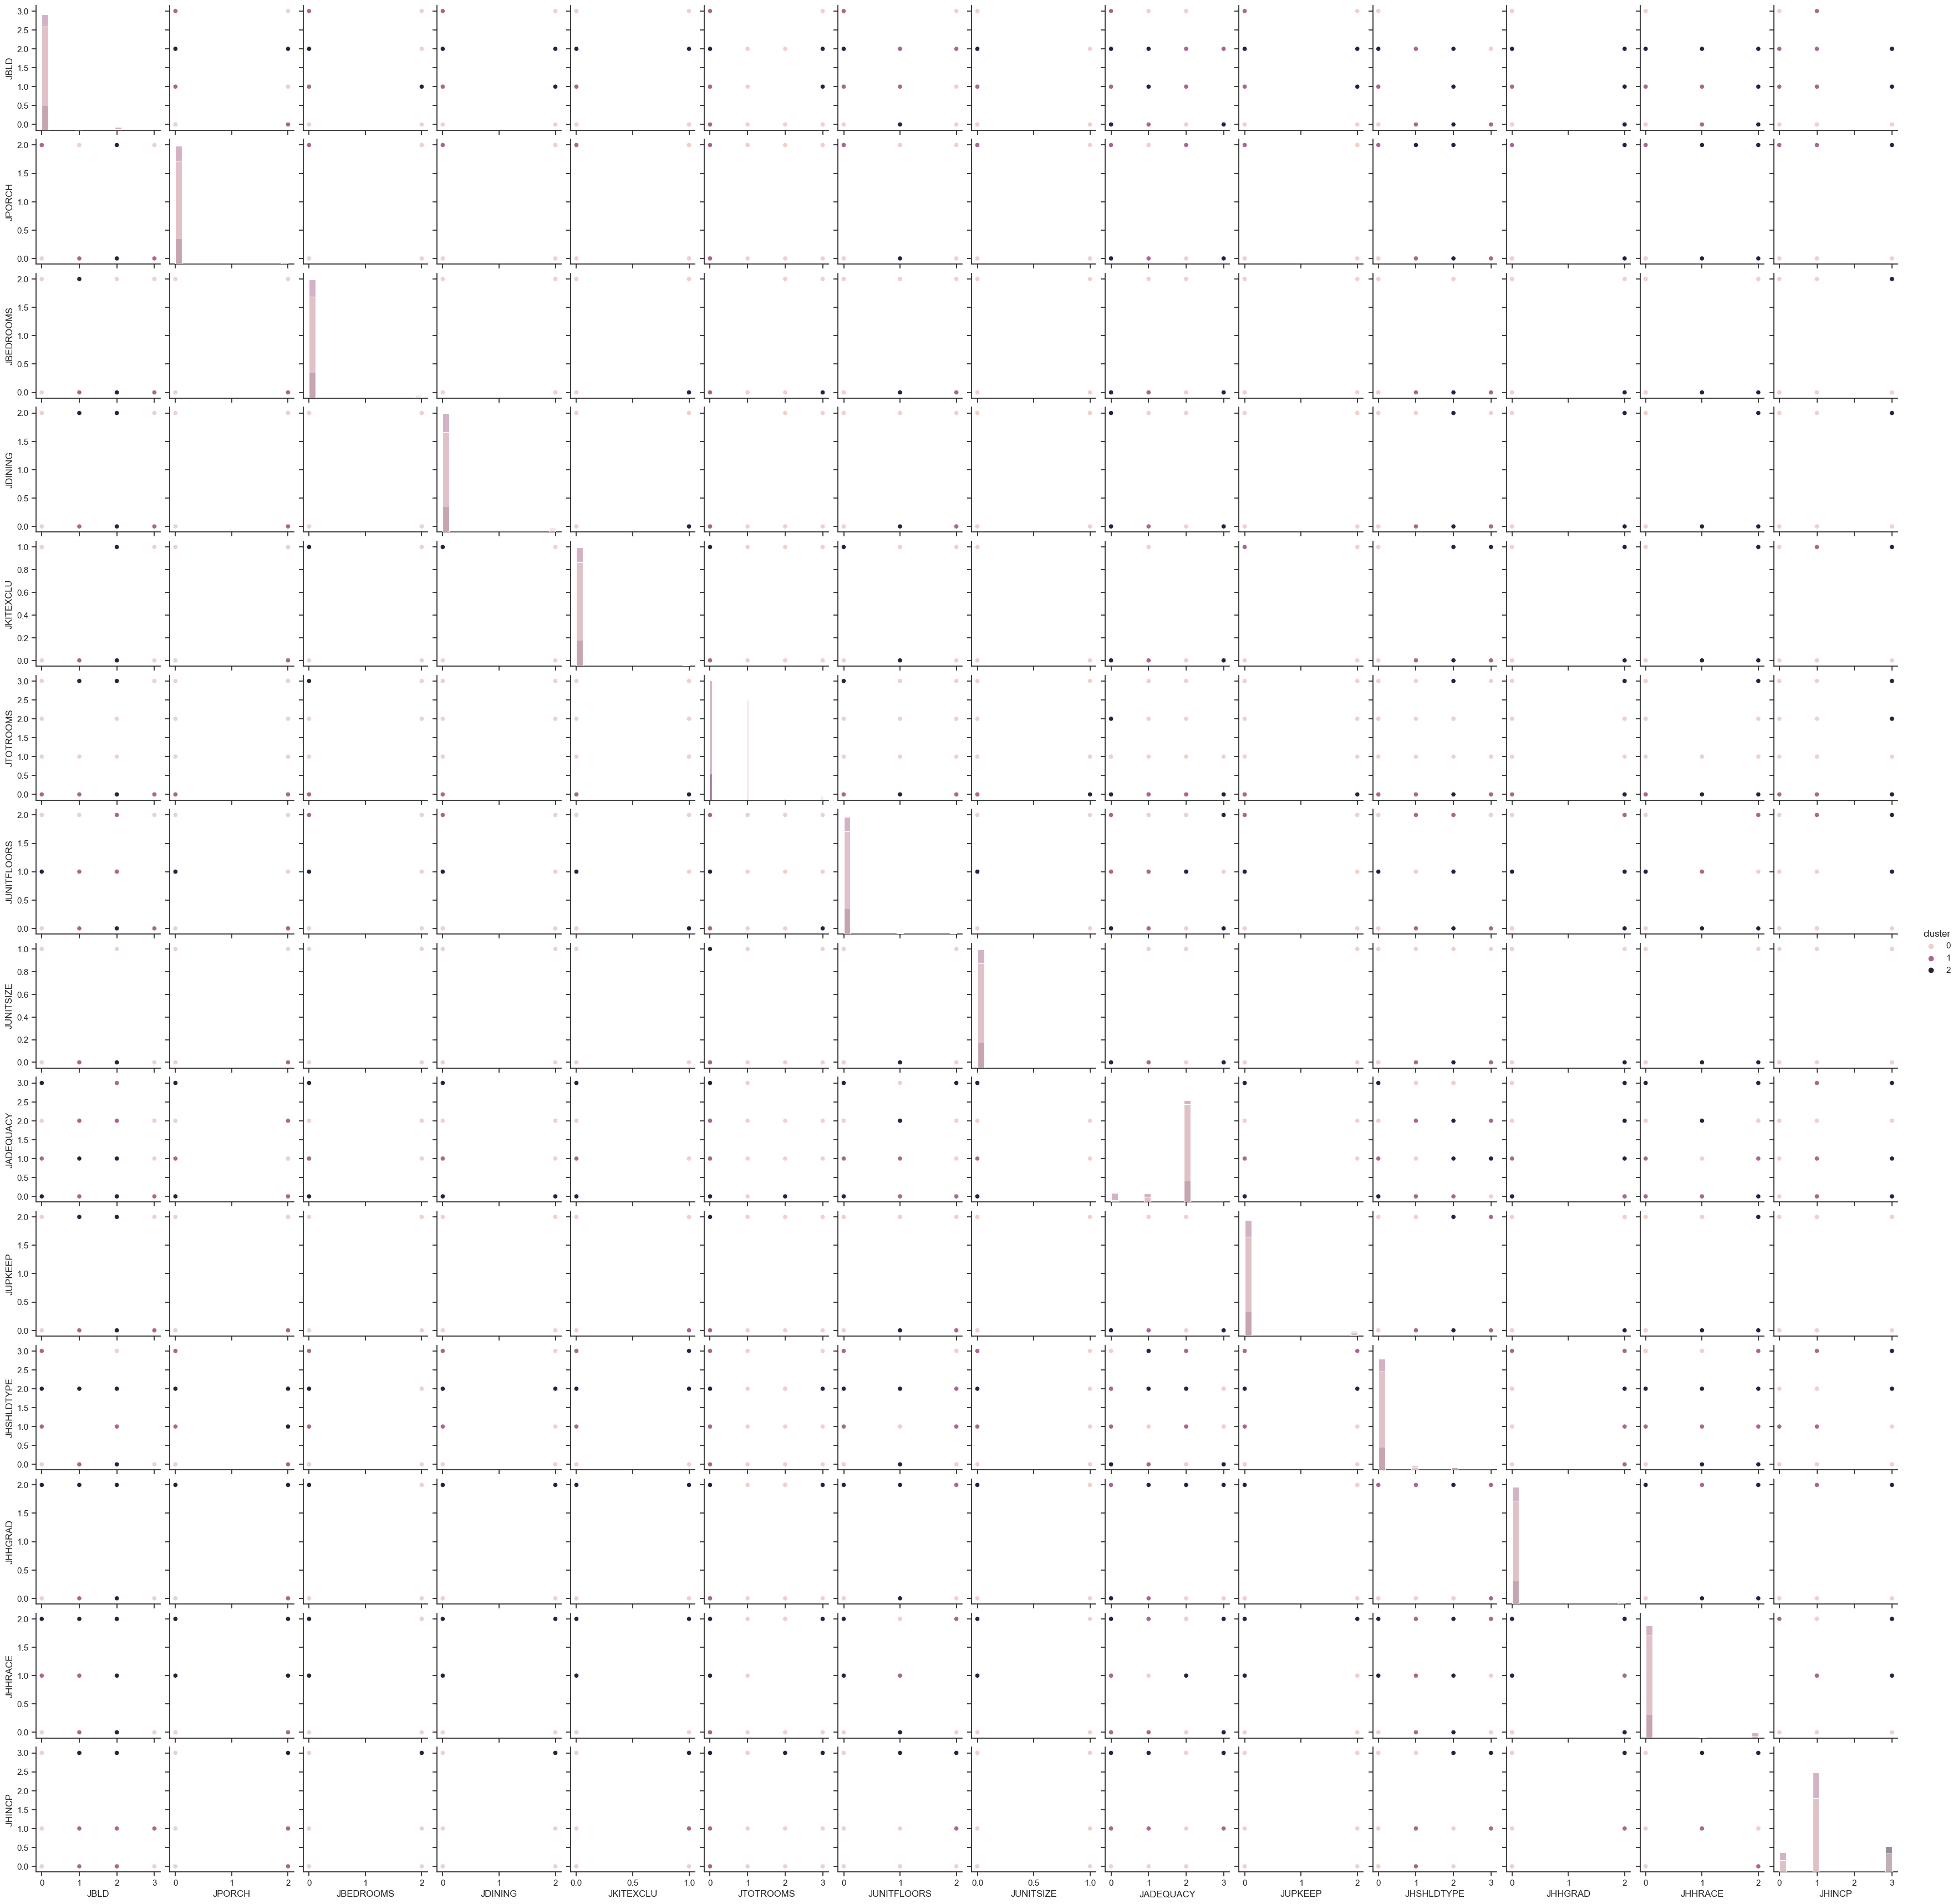

In [42]:
#Add the cluster labels to var20 and plot them against each variable
var20_clustered = var20.copy()
var20_clustered['cluster'] = kmodes_clusters_20
sns.pairplot(var20_clustered, hue='cluster', diag_kind='hist')
plt.show()

In [43]:
#Count of classes
var20_clustered['cluster'].value_counts()

1    30575
0    26911
2     6655
Name: cluster, dtype: int64

In [44]:
#determine what cluster represents each social class by checking the mean family income
mean_income = var20_clustered.groupby('cluster')['JHINCP'].mean()
print(mean_income)

cluster
0    1.240831
1    0.836402
2    3.000000
Name: JHINCP, dtype: float64


In [47]:
var20_clustered['cluster'] = var20_clustered['cluster'].replace({0:2, 1:1, 2:3})
var20_clustered['cluster'].value_counts()

1    30575
2    26911
3     6655
Name: cluster, dtype: int64

## ALL TOGETHER

In [48]:
var15_clustered["Year"] = 2015
var17_clustered["Year"] = 2017
var20_clustered["Year"] = 2020
alt = pd.concat([var15_clustered, var17_clustered, var20_clustered], ignore_index=True)
alt

,JBLD,JPORCH,JBEDROOMS,JDINING,JKITCHENS,JKITEXCLU,JTOTROOMS,JUNITFLOORS,JUNITSIZE,JADEQUACY,JUPKEEP,JHSHLDTYPE,JHHGRAD,JHHRACE,JFINCP,JHINCP,cluster,Year,JBATHROOMS
0,0,0,0,0,0.0,0,1,0,0,2,0,2,0,0,0.0,1,2,2015,NaN
1,0,0,0,0,0.0,0,1,0,0,2,0,0,0,0,0.0,1,2,2015,NaN
2,0,0,0,0,0.0,0,0,0,0,2,2,0,2,0,0.0,1,1,2015,NaN
3,0,0,0,0,0.0,0,1,0,0,2,0,0,0,0,1.0,1,2,2015,NaN
4,0,0,0,0,0.0,0,0,0,0,2,0,0,0,0,2.0,3,3,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200381,0,2,0,0,NaN,0,0,0,0,2,0,0,0,0,NaN,0,1,2020,NaN
200382,0,0,0,0,NaN,0,0,0,0,2,0,0,0,0,NaN,1,1,2020,NaN
200383,0,0,0,0,NaN,0,1,0,0,2,0,0,0,0,NaN,0,2,2020,NaN
200384,0,0,0,0,NaN,0,0,0,0,1,0,0,0,0,NaN,1,1,2020,NaN


## 5. Save our results

In [52]:
usaclass = {
    "Year": [2015, 2017, 2020],
    "Lower_Class": [30563,10149 , 30575],
    "Middle_Class": [26623, 25720, 26911],
    "High_Class": [12307, 30883, 6655],
}

usaclass = pd.DataFrame(usaclass)
usaclass

,Year,Lower_Class,Middle_Class,High_Class
0,2015,30563,26623,12307
1,2017,10149,25720,30883
2,2020,30575,26911,6655


Export them to a csv file

In [53]:
usaclass.to_csv('/Users/mac/Desktop/TFG/data/code/classes/usaclass.csv', index=False)

## 6. Merge with sexual harassment cases to gain insights

In [54]:
import pandas as pd

data = {'Year': [2015, 2017, 2020],
        'Sexual_Harassment_Cases': [368921, 363393, 298628]}
sh = pd.DataFrame(data)
sh


,Year,Sexual_Harassment_Cases
0,2015,368921
1,2017,363393
2,2020,298628


In [55]:
combined = pd.merge(alt, sh, on="Year")
combined

,JBLD,JPORCH,JBEDROOMS,JDINING,JKITCHENS,JKITEXCLU,JTOTROOMS,JUNITFLOORS,JUNITSIZE,JADEQUACY,JUPKEEP,JHSHLDTYPE,JHHGRAD,JHHRACE,JFINCP,JHINCP,cluster,Year,JBATHROOMS,Sexual_Harassment_Cases
0,0,0,0,0,0.0,0,1,0,0,2,0,2,0,0,0.0,1,2,2015,NaN,368921
1,0,0,0,0,0.0,0,1,0,0,2,0,0,0,0,0.0,1,2,2015,NaN,368921
2,0,0,0,0,0.0,0,0,0,0,2,2,0,2,0,0.0,1,1,2015,NaN,368921
3,0,0,0,0,0.0,0,1,0,0,2,0,0,0,0,1.0,1,2,2015,NaN,368921
4,0,0,0,0,0.0,0,0,0,0,2,0,0,0,0,2.0,3,3,2015,NaN,368921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200381,0,2,0,0,NaN,0,0,0,0,2,0,0,0,0,NaN,0,1,2020,NaN,298628
200382,0,0,0,0,NaN,0,0,0,0,2,0,0,0,0,NaN,1,1,2020,NaN,298628
200383,0,0,0,0,NaN,0,1,0,0,2,0,0,0,0,NaN,0,2,2020,NaN,298628
200384,0,0,0,0,NaN,0,0,0,0,1,0,0,0,0,NaN,1,1,2020,NaN,298628


Lets take a closer look at each each cluster

In [57]:
cluster_groups = combined.groupby("cluster")
for cluster, group in cluster_groups:
    print(f"Cluster {cluster}:")
    print(group.describe())

Cluster 1:
               JBLD        JPORCH     JBEDROOMS       JDINING  JKITCHENS  \
count  71287.000000  71287.000000  71287.000000  71287.000000    30563.0   
mean       0.075806      0.007252      0.019919      0.026484        0.0   
std        0.378644      0.097614      0.198602      0.228623        0.0   
min        0.000000      0.000000      0.000000      0.000000        0.0   
25%        0.000000      0.000000      0.000000      0.000000        0.0   
50%        0.000000      0.000000      0.000000      0.000000        0.0   
75%        0.000000      0.000000      0.000000      0.000000        0.0   
max        3.000000      2.000000      2.000000      2.000000        0.0   

          JKITEXCLU     JTOTROOMS   JUNITFLOORS     JUNITSIZE     JADEQUACY  \
count  71287.000000  71287.000000  71287.000000  71287.000000  71287.000000   
mean       0.010002      0.076690      0.017857      0.000056      1.709288   
std        0.099508      0.381364      0.170909      0.007491      

Now we will see what variables had more importance for the cluster attribution using LASSO regression.

In [58]:
combined

,JBLD,JPORCH,JBEDROOMS,JDINING,JKITCHENS,JKITEXCLU,JTOTROOMS,JUNITFLOORS,JUNITSIZE,JADEQUACY,JUPKEEP,JHSHLDTYPE,JHHGRAD,JHHRACE,JFINCP,JHINCP,cluster,Year,JBATHROOMS,Sexual_Harassment_Cases
0,0,0,0,0,0.0,0,1,0,0,2,0,2,0,0,0.0,1,2,2015,NaN,368921
1,0,0,0,0,0.0,0,1,0,0,2,0,0,0,0,0.0,1,2,2015,NaN,368921
2,0,0,0,0,0.0,0,0,0,0,2,2,0,2,0,0.0,1,1,2015,NaN,368921
3,0,0,0,0,0.0,0,1,0,0,2,0,0,0,0,1.0,1,2,2015,NaN,368921
4,0,0,0,0,0.0,0,0,0,0,2,0,0,0,0,2.0,3,3,2015,NaN,368921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200381,0,2,0,0,NaN,0,0,0,0,2,0,0,0,0,NaN,0,1,2020,NaN,298628
200382,0,0,0,0,NaN,0,0,0,0,2,0,0,0,0,NaN,1,1,2020,NaN,298628
200383,0,0,0,0,NaN,0,1,0,0,2,0,0,0,0,NaN,0,2,2020,NaN,298628
200384,0,0,0,0,NaN,0,0,0,0,1,0,0,0,0,NaN,1,1,2020,NaN,298628


In [59]:
X = combined[['JBLD','JPORCH','JBEDROOMS','JDINING','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JHINCP']]
y = combined['cluster']
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)
coef = pd.Series(lasso.coef_, index=X.columns)
print("LASSO coefficients:")
print(coef.abs().sort_values())

LASSO coefficients:
JBLD           0.000000
JPORCH         0.000000
JBEDROOMS      0.000000
JDINING        0.000000
JKITEXCLU      0.000000
JTOTROOMS      0.000000
JUNITFLOORS    0.000000
JUNITSIZE      0.000000
JADEQUACY      0.000000
JUPKEEP        0.000000
JHSHLDTYPE     0.000000
JHHGRAD        0.000000
JHHRACE        0.000000
JHINCP         0.280951
dtype: float64


In [60]:
time_series_data = combined.pivot_table(index="Year", columns="cluster", values="Sexual_Harassment_Cases")

for cluster in time_series_data.columns:
    model = ARIMA(time_series_data[cluster], order=(1, 1, 1))
    results = model.fit()
    print(f"Cluster {cluster}:")
    print(results.summary())
    print("Forecast for the next year:")
    print(results.forecast(steps=1))


/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Cluster 1:
                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                    3
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -23.552
Date:                Mon, 01 May 2023   AIC                             53.103
Time:                        09:14:09   BIC                             49.183
Sample:                             0   HQIC                            44.904
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8162   3788.094      0.000      1.000   -7423.711    7425.344
ma.L1         -1.0000   2.07e+05  -4.84e-06      1.000   -4.05e+05    4.05e+05
sigma2      9.104e+08      0.000   3.87e+

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1327: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1339: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site

Cluster 2:
                               SARIMAX Results                                
Dep. Variable:                      2   No. Observations:                    3
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -23.552
Date:                Mon, 01 May 2023   AIC                             53.103
Time:                        09:14:09   BIC                             49.183
Sample:                             0   HQIC                            44.904
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8162   3788.094      0.000      1.000   -7423.711    7425.344
ma.L1         -1.0000   2.07e+05  -4.84e-06      1.000   -4.05e+05    4.05e+05
sigma2      9.104e+08      0.000   3.87e+

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1327: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1339: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site

We will now look at some differences among the social classes

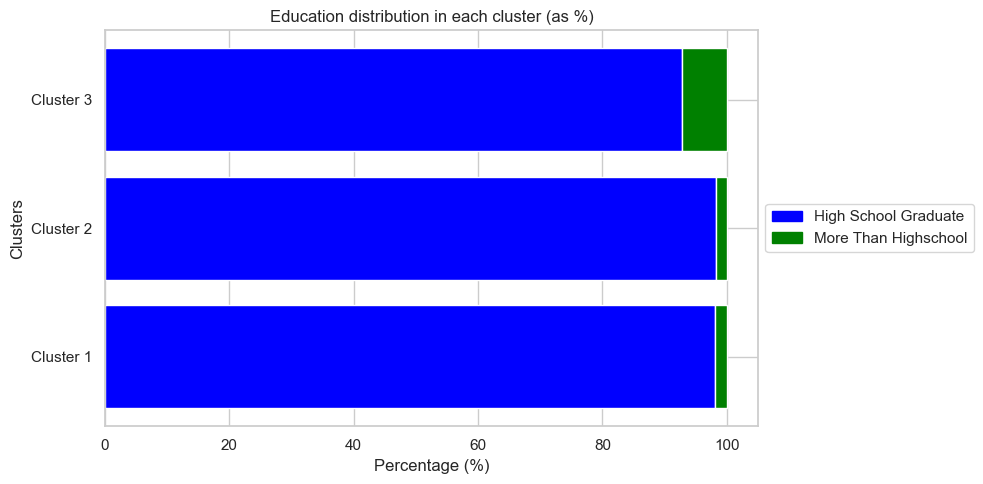

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))

cluster_labels = []
education_labels = ['High School Graduate', 'More Than Highschool']
colors = ['blue', 'green']

for i in range(1, 4):
    cluster_data = combined[combined['cluster'] == i]
    sector_counts = cluster_data['JHHGRAD'].value_counts()
    selected_values = sector_counts.reindex([0, 2]).fillna(0)
    total_count = selected_values.sum()
    selected_values = (selected_values / total_count) * 100
    bottom = 0
    for j, (label, value) in enumerate(selected_values.items()):
        ax.barh(i, value, left=bottom, color=colors[j])
        bottom += value

    cluster_labels.append(f'Cluster {i}')
ax.set_yticks(range(1, 4))
ax.set_yticklabels(cluster_labels)
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Clusters')
ax.set_title('Education distribution in each cluster (as %)')
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_patches, education_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

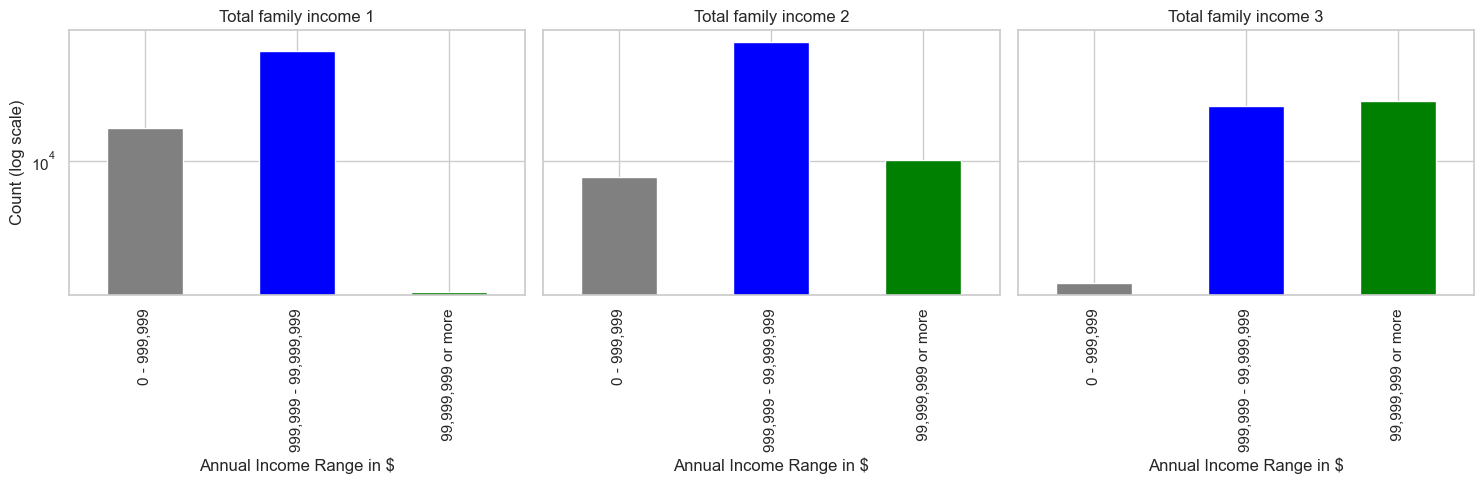

In [94]:
#Total income
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i in range(1, 4):
    cluster_data = combined[combined['cluster'] == i]
    sector_counts = cluster_data['JHINCP'].value_counts()
    # Reindex the Series to include all desired index values
    selected_values = sector_counts.reindex([0, 1, 3]).fillna(0)
    # Select colours
    selected_values.plot(kind='bar', ax=axes[i-1], color=['grey', 'blue', 'green'])
    axes[i-1].set_title(f'Total family income {i}')
    axes[i-1].set_xlabel('Annual Income Range in $')
    axes[i-1].set_ylabel('Count (log scale)')
    axes[i-1].set_xticklabels(['0 - 1M', '1M - 100M', ' 100M or more']) # Set the x-tick labels
    axes[i-1].set_yscale('log') # Set the y-axis scale to logarithmic
plt.tight_layout()
plt.show()